<a href="https://colab.research.google.com/github/jhcool1988/HelloMVC/blob/master/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class kmeans:
  def __init__(self,k,input):
    self.k=k
    self.df=input
    self.C=None
  
  # k개의 중심값을 임의로 선택한다
  def centroids(self):
    import random
    C={
    i:[data for data in self.df.values[i]]
    for i,j in zip(range(self.k),random.sample(range(len(self.df)),self.k))} 
    return C
  
  # 각 중심에서 데이터까지의 거리를 계산 using np.linalg.norm
  # 각 데이터에 가장 가까운 중심점(군집)을 할당
  def classify(self,C):
    import copy
    clsuter_df=copy.deepcopy(self.df)
    col_n=clsuter_df.shape[1]
    for i in C.keys():
      clsuter_df["Distance_from_{}".format(i)]\
      =np.linalg.norm(np.array(clsuter_df)[:,:col_n]-C[i],axis=1)
    dist_cols=["Distance_from_{}".format(i) for i in C.keys()]
    clsuter_df["Closet_Cluster"]=clsuter_df.loc[:,dist_cols].idxmin(axis=1).map(lambda x:int(x.lstrip("Distance_from_")))
    return clsuter_df
  
  # 각 중심점에 선택된 데이터 포인터들의 평균위치로 중심점을 재이동
  def update(self,C):
    c_df=self.classify(C)
    self.C={
    i:[c for c in np.mean(self.df[c_df["Closet_Cluster"]==i],axis=0)]
      for i in c_df["Closet_Cluster"].unique()}
    return self.C

  # 위 과정을 '갱신된 중심점이 거의 변화가 없어 할당된 군집이 바뀌지 않을만큼' 반복
  def train_cluster(self):
    assignments=None
    C=self.centroids()
    while True:
      # 중심점에 해당되는 군집 찾기
      cluster_df=self.classify(C)
      new_assignments=list(self.classify(C)["Closet_Cluster"])
      # 새로운 중심점 찾기
      new_C=self.update(C)
      # '할당된 군집'이 바뀌지 않을 만큼 중심점이 수렴했다면 종료
      if assignments==new_assignments:
        break
      # 아니라면 다시 중심점과 군집 찾기
      assignments=new_assignments
      C=new_C
    return new_C, np.array(new_assignments), cluster_df
    

In [ ]:
#test_data
group=pd.read_csv("https://raw.githubusercontent.com/jhcool1988/teamdata/master/2019stats.csv",header=0)
group

,R,Player,Name,Club,Age,Main position,Apps,Mins,Goals,Assists,Shot per Game,Key Pass,Drb,Fouled,Rating
0,1,Lionel Messi,Messi,Barcelona,32,FW,21,1891,19,12,4.8,2.5,5.4,1.7,8.61
1,2,Neymar,Neymar,Paris Saint-Germain,28,FW,15,1322,13,6,4.7,2.6,6.0,4.1,8.58
2,3,Robert Lewandowski,Lewandowski,Bayern Munich,31,FW,23,2042,25,3,4.7,1.2,2.1,1.5,8.16
3,4,Kylian Mbappé,Mbappé,Paris Saint-Germain,21,FW,17,1516,18,5,4.4,2.0,2.8,1.1,8.14
4,5,Josip Ilicic,Ilicic,Atalanta,32,FW,19,1492,15,5,3.6,2.5,2.6,2.4,7.95
5,6,Kevin De Bruyne,De Bruyne,Manchester City,28,FW,25,2156,8,16,2.9,3.7,1.4,0.7,7.92
6,7,Cristiano Ronaldo,Ronaldo,Juventus,35,FW,22,1945,21,3,5.9,1.7,1.8,1.9,7.90
7,8,Jadon Sancho,Sancho,Borussia Dortmund,20,FW,21,1807,14,15,2.0,2.3,2.6,0.6,7.90
8,9,Ángel Di María,Di María,Paris Saint-Germain,32,FW,23,2005,8,14,2.8,3.0,2.6,0.8,7.75
9,10,Dimitri Payet,Payet,Marseille,33,FW,22,1937,9,4,2.9,4.0,2.3,1.4,7.73


In [ ]:
group=group[["Goals", "Assists", "Drb"]]
group.head()

,Goals,Assists,Drb
0,19,12,5.4
1,13,6,6.0
2,25,3,2.1
3,18,5,2.8
4,15,5,2.6


In [ ]:
# 직접 구현한 k-means 알고리즘과 sklearn library와 결과비교하기
model1=kmeans(4,group)
from sklearn.cluster import KMeans
model2=KMeans(n_clusters=4, init="k-means++").fit(group)

In [ ]:
model1.train_cluster()[0] # 중심점

{0: [6.625, 13.125, 1.8750000000000002],
 1: [4.818181818181818, 3.6363636363636362, 2.0181818181818185],
 2: [22.6, 6.4, 2.3600000000000003],
 3: [13.733333333333333, 5.2, 1.8666666666666665]}

In [ ]:
model2.cluster_centers_ # 중심점 using sklearn

array([[ 4.17647059,  2.76470588,  1.98823529],
       [20.75      ,  5.375     ,  2.0625    ],
       [12.21428571,  5.42857143,  1.92857143],
       [ 6.36363636, 11.72727273,  1.99090909]])

In [ ]:
model1.train_cluster()[2].head(2) # 거리와 군집을 포함한 cluster df

,Goals,Assists,Drb,Distance_from_2,Distance_from_3,Distance_from_0,Distance_from_1,Closet_Cluster
0,19,12,5.4,7.318579,9.298506,12.916341,16.808066,2
1,13,6,6.0,10.274707,4.273432,10.412583,9.401266,3


In [ ]:
def ssd(input, n_k):# sum_of_squared_distance
  dist_list=[]
  for i in range(1,n_k+1):
    fit=kmeans(i,input)
    C=fit.train_cluster()[0]
    C_df=fit.classify(C)
    dist=[np.sum(C_df.loc[C_df["Closet_Cluster"]==j,"Distance_from_{}".format(j)]**2)
    for j in [c for c in C.keys()]]
    dist_list.append(np.sum(dist))
  return dist_list,range(1,n_k+1)

def elbow(x,n_k): # sum_of_squared_distance using sklearn
  sse=[]
  for i in range(1,n_k+1):
    km=KMeans(n_clusters=i,init="k-means++").fit(x)
    sse.append(km.inertia_)
  return sse, range(1,n_k+1)


In [ ]:
def wcss1(input,k):
  Info=ssd(input,k)
  plt.plot(Info[1],Info[0],marker="o",color="c")
  plt.xticks(Info[1])
  plt.xlabel("K")
  plt.ylabel("Total Squared Error")
  plt.title("Within #Cluster sum of squares")
  plt.show()

In [ ]:
def wcss2(input,k):
  Info=ssd(input,k)
  plt.plot(Info[1],Info[0],marker="o",color="c")
  plt.xticks(Info[1])
  plt.xlabel("K")
  plt.ylabel("Total Squared Error")
  plt.title("Within #Cluster sum of squares")
  plt.show()

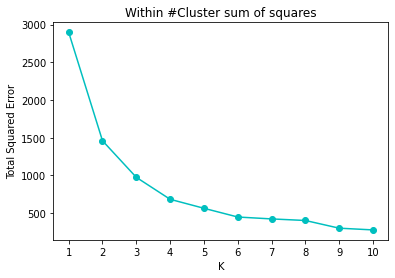

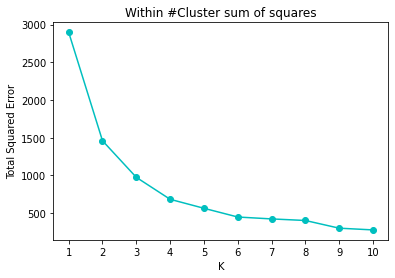

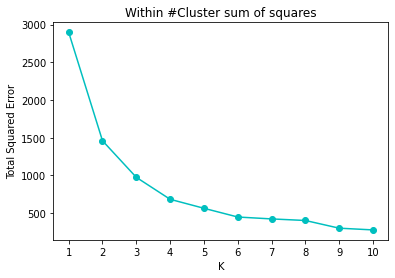

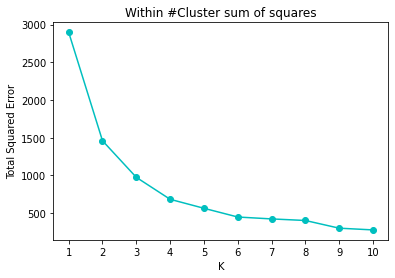

1 loop, best of 3: 1.68 s per loop


In [ ]:
%timeit wcss1(group,10)

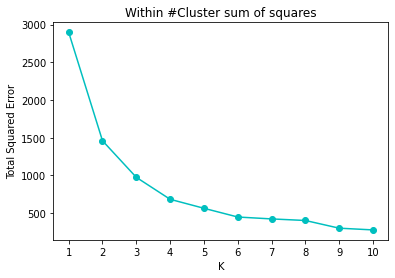

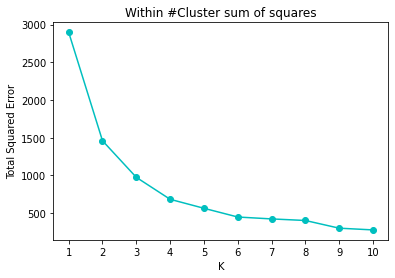

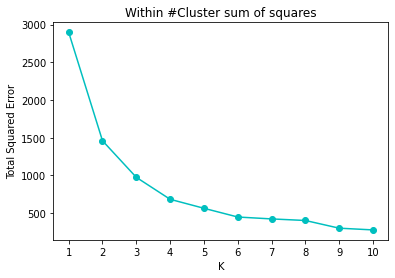

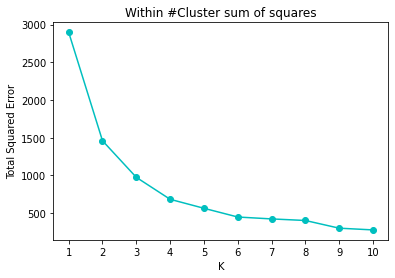

1 loop, best of 3: 1.69 s per loop


In [ ]:
%timeit wcss2(group,10)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50659 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_

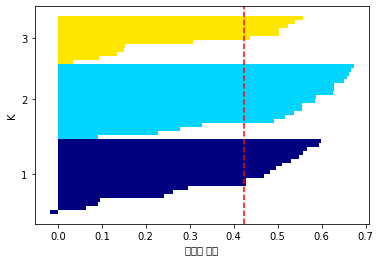

In [ ]:
# 실루엣 기법
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from matplotlib import cm

def plotSilhouette(x, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(x, y_km, metric = 'euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)

        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)

    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color = 'red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('K')
    plt.xlabel('실루엣 계수')
    plt.show()

k= 3

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)
km = KMeans(n_clusters=k, algorithm='auto', random_state=42)
y_km = km.fit_predict(group)
plotSilhouette(group, y_km)

Text(0.5, 0, 'dribbles')

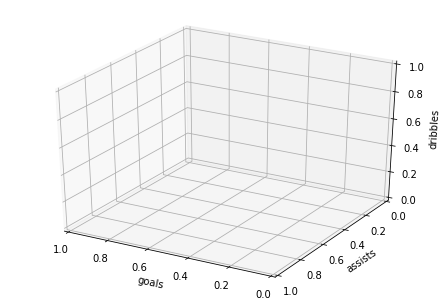

In [ ]:
# k=4인 group 3D plotting using sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(facecolor='w')
ax=Axes3D(fig,rect=[0,0,1,1],elev=30,azim=120)
ax.set_xlabel('goals')
ax.set_ylabel('assists')
ax.set_zlabel('dribbles')

In [ ]:
from sklearn.cluster import KMeans
model2=KMeans(4,init="k-means++", random_state=0).fit(group)
labels=pd.Series(model2.labels_,dtype="category")
labels=labels.cat.rename_categories(["sniper","helper","truider","magition"])
c0,c1,c2,c3=model2.cluster_centers_; print(c0,c1,c2,c3)
cluster=[0,1,2,3]
col=["g","b","r","y"]
mark=["o","*","^","&"]
center=[c0,c1,c2,c3]

ValueError: ignored

In [ ]:
print(center[0][:])
print(center[:][1])
print(center[:][2])
print(center[:][3])

[ 6.36363636 11.72727273  1.99090909]


In [ ]:
# 'centX':center[0][:], 'centY':center[1][:],'centZ':center[2][:]
df = pd.DataFrame({'cluster':cluster, 'col':col, 'mark':mark })
df

ValueError: ignored

In [ ]:
cluster,col,mark = df.iloc[0, :]

In [ ]:
# group.iloc[model2.labels_ == 0,0]
# group.iloc[model2.labels_ == 1,0]
group.iloc[model2.labels_ == 2,0]
# group.iloc[model2.labels_ == 3,0]

12    4
19    3
20    3
21    1
26    3
30    6
32    7
33    7
35    7
36    5
37    2
39    3
41    6
42    2
44    1
46    7
48    4
Name: Goals, dtype: int64

0
1
2
3


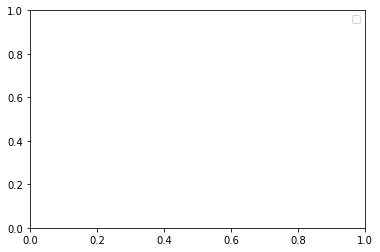

In [ ]:
for i in range(0, 3+1):
    print(i)
    cluster,col,mark in df.iloc[0 :]
    # ax.scatter(group.iloc[model2.labels_ == cluster,0],\
    # group.iloc[model2.labels_==cluster,1],\
    # group.iloc[model2.labels_==cluster,2],\
    # group.iloc[model2.labels_==cluster,3],\
    # s=5,marker=mark,c=col,label=labels)
plt.legend(labels)
plt.show()

In [ ]:
for cluster,col,mark,center in df:
      ax.scatter(group.iloc[model2.labels_ == cluster,0],\
    group.iloc[model2.labels_==cluster,1],\
    group.iloc[model2.labels_==cluster,2],\
    group.iloc[model2.labels_==cluster,3],\
    s=5,marker=mark,c=col,label=labels)
plt.legend(labels)
plt.show()

ValueError: ignored

In [ ]:
from sklearn.cluster import KMeans
model2=KMeans(3,init="k-means++", random_state=0).fit(group)
labels=pd.Series(model2.labels_,dtype="category")
labels=labels.cat.rename_categories(["sniper","helper","truider"])

c0,c1,c2=model2.cluster_centers_; print(c0,c1,c2)
cluster=(0,1,2)
col=("g","b","r")
mark=("o","*","^")
center=(c0,c1,c2)

[16.21052632  5.31578947  2.        ] [4.68421053 2.94736842 1.97368421] [ 6.75  11.5    1.975]


In [ ]:
for cluster,col,mark,center in zip(cluster,col,mark,center):
      ax.scatter(group.iloc[model2.labels_ == cluster,0],\
    group.iloc[model2.labels_==cluster,1],\
    group.iloc[model2.labels_==cluster,2],\
    s=5,marker=mark,c=col,label=labels)
plt.legend(labels)
plt.show()

TypeError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

group=pd.read_csv("https://raw.githubusercontent.com/jhcool1988/teamdata/master/2019stats.csv",header=0)
X = group[["Goals", "Assists"]]
y = group["Drb"]

estimators = ['k_means_iris_3', KMeans(n_clusters=3)]

fignum = 1
titles = ['3 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

ValueError: ignored